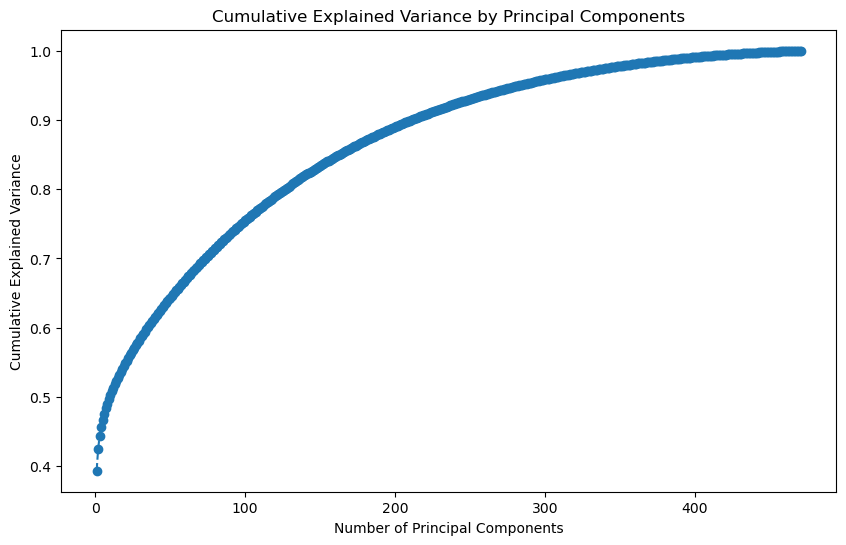

                 PC1       PC2       PC3       PC4       PC5       PC6  \
date                                                                     
2011-01-04  7.511892  2.244150 -0.471781  1.392350 -2.103283 -8.592126   
2011-01-05 -6.276643 -4.758080  1.555714  2.484736 -0.328336 -0.611519   
2011-01-06  3.950712 -1.353973  1.843456 -2.629848  0.174331 -6.877711   
2011-01-07  2.679768  0.302129 -3.716509 -1.975963  1.055373 -0.523861   
2011-01-10  1.841507 -3.453062  0.527925 -2.309547  1.227996  0.557420   

                 PC7       PC8       PC9      PC10  ...     PC275     PC276  \
date                                                ...                       
2011-01-04 -0.645053 -1.862551 -0.778526  0.199403  ... -0.267736  0.175930   
2011-01-05  0.962329  0.648767  1.686612  1.205805  ... -0.046724 -0.978202   
2011-01-06  3.497459 -0.969341 -1.222570  0.241753  ... -0.794626  0.348494   
2011-01-07 -0.558962 -1.900811 -1.138384  2.038112  ...  0.326476  0.701707   
2011-01

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv'  # Update with the actual file path
stock_data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(log_returns_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Determine the optimal number of components
# You can choose a threshold for the explained variance (e.g., 95%) and find the corresponding number of components
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

# Fit PCA with the optimal number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(log_returns_standardized)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, num_components + 1)]
pca_df = pd.DataFrame(data=pca_result, columns=columns, index=log_returns.index)

# Print the DataFrame with the principal components
print(pca_df.head())



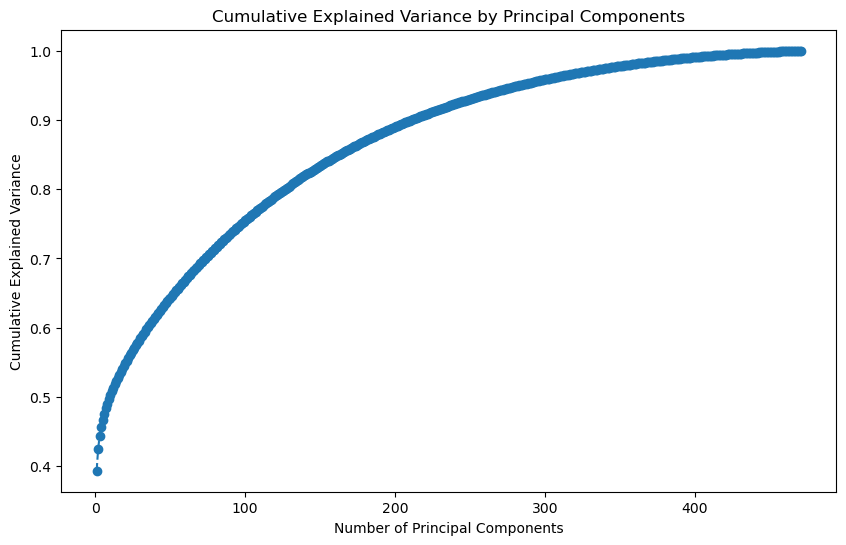

                 PC1       PC2       PC3       PC4       PC5       PC6  \
date                                                                     
2011-01-04  7.511892  2.244150 -0.471781  1.392349 -2.103282 -8.592127   
2011-01-05 -6.276643 -4.758080  1.555714  2.484734 -0.328330 -0.611527   
2011-01-06  3.950712 -1.353973  1.843456 -2.629847  0.174333 -6.877700   
2011-01-07  2.679768  0.302129 -3.716509 -1.975964  1.055377 -0.523848   
2011-01-10  1.841507 -3.453062  0.527925 -2.309546  1.227989  0.557413   

                 PC7       PC8       PC9      PC10  ...     PC275     PC276  \
date                                                ...                       
2011-01-04 -0.645056 -1.862545 -0.778530  0.199409  ...  0.002184 -0.149839   
2011-01-05  0.962341  0.648776  1.686584  1.205705  ... -0.115747 -0.029219   
2011-01-06  3.497463 -0.969371 -1.222588  0.241721  ...  0.934952 -0.488138   
2011-01-07 -0.558966 -1.900798 -1.138422  2.038088  ...  0.819970 -0.311665   
2011-01

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv'  # Update with the actual file path
stock_data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(log_returns_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Determine the optimal number of components
# You can choose a threshold for the explained variance (e.g., 95%) and find the corresponding number of components
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

# Fit PCA with the optimal number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(log_returns_standardized)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, num_components + 1)]
pca_df = pd.DataFrame(data=pca_result, columns=columns, index=log_returns.index)

# Print the DataFrame with the principal components
print(pca_df.head())


In [9]:
import pandas as pd
import numpy as np

# Replace 'path/to/your/stock_data.csv' with the actual path to your CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv'

# Read stock price data from the CSV file
stock_data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1))

# Drop the first row with NaN values resulting from the shift
log_returns = log_returns.dropna()

# Print the DataFrame with log returns
print(log_returns.head())


                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-04 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-05  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-06 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-07  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-10  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   

                 AES       AET       AFL         A  ...       WYN      WYNN  \
date                                                ...                       
2011-01-04  0.004773  0.005141 -0.018417 -0.009356  ... -0.006214  0.030719   
2011-01-05  0.013402  0.009569 -0.001949 -0.002172  ... -0.003286  0.012819   
2011-01-06  0.017081  0.018557 -0.005514  0.001931  ... -0.014589  0.007264   
2011-01-07  0.000000  0.002179 -0.003931  0.003369  ... -0.003681  0.034794   
2011-01

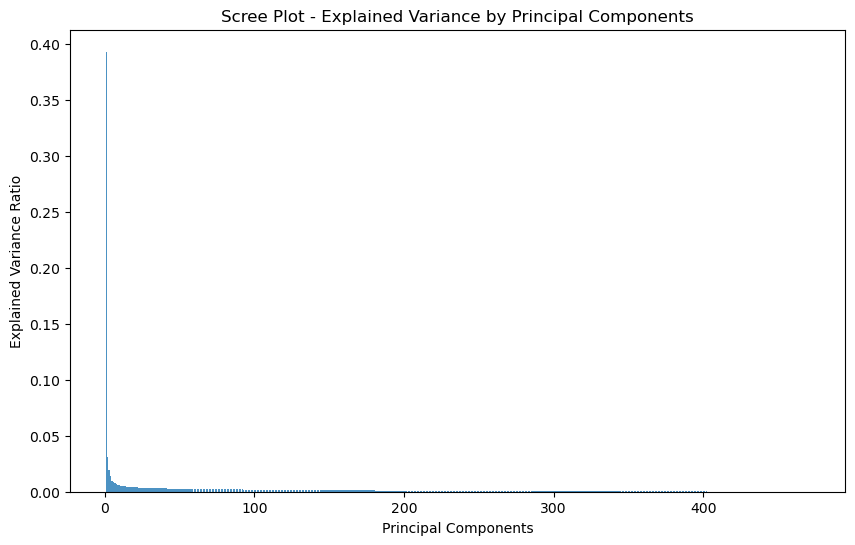

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_data' is your DataFrame with columns 'date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES'

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv' 
stock_data = pd.read_csv(file_path, parse_dates=['date'])

# Ensure the 'date' column is of datetime type and set it as the index
stock_data.set_index('date', inplace=True)

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(log_returns_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center', alpha=0.8)

plt.title('Scree Plot - Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


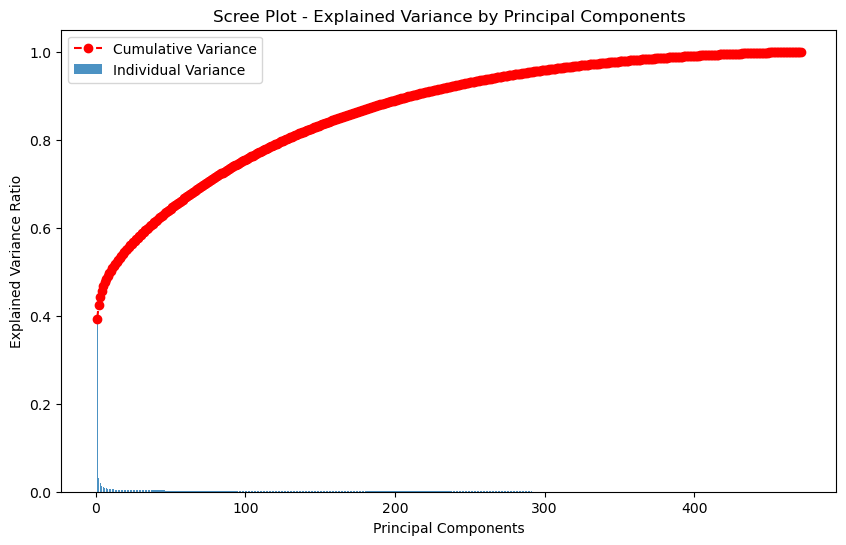

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_data' is your DataFrame with columns 'date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES'

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv' 
stock_data = pd.read_csv(file_path, parse_dates=['date'])

# Ensure the 'date' column is of datetime type and set it as the index
stock_data.set_index('date', inplace=True)

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(log_returns_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))

# Bar plot for explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center', alpha=0.8, label='Individual Variance')

# Line plot for cumulative explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r', label='Cumulative Variance')

plt.title('Scree Plot - Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()


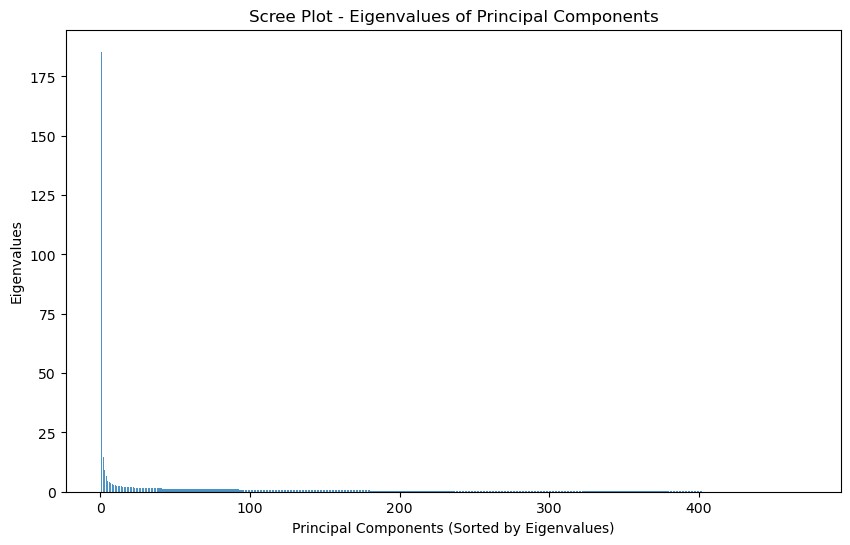

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_data' is your DataFrame with columns 'date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES'

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv' 

stock_data = pd.read_csv(file_path, parse_dates=['date'])

# Ensure the 'date' column is of datetime type and set it as the index
stock_data.set_index('date', inplace=True)

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(log_returns_standardized)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, align='center', alpha=0.8)
plt.title('Scree Plot - Eigenvalues of Principal Components')
plt.xlabel('Principal Components (Sorted by Eigenvalues)')
plt.ylabel('Eigenvalues')
plt.show()


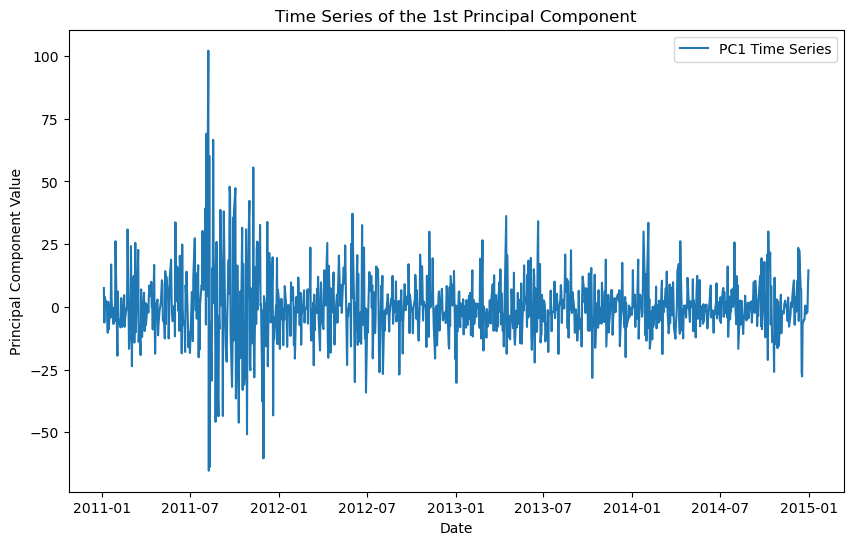

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_data' is your DataFrame with columns 'date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES'

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv' 

stock_data = pd.read_csv(file_path, parse_dates=['date'])

# Ensure the 'date' column is of datetime type and set it as the index
stock_data.set_index('date', inplace=True)

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca_result = pca.fit_transform(log_returns_standardized)

# Extract the 1st principal component
pc1_time_series = pca_result[:, 0]

# Plot the time series of the 1st principal component
plt.figure(figsize=(10, 6))
plt.plot(log_returns.index, pc1_time_series, label='PC1 Time Series')
plt.title('Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_data' is your DataFrame with columns 'date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES'
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv' 

# Read stock price data from a CSV file
stock_data = pd.read_csv(file_path, parse_dates=['date'])

# Ensure the 'date' column is of datetime type and set it as the index
stock_data.set_index('date', inplace=True)

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca_result = pca.fit_transform(log_returns_standardized)

# Extract the 1st principal component
pc1_time_series = pca_result[:, 0]

# Find the date with the lowest value
date_with_lowest_value = log_returns.index[np.argmin(pc1_time_series)]

print(f"The date with the lowest value in the 1st principal component time series is: {date_with_lowest_value}")


The date with the lowest value in the 1st principal component time series is: 2011-08-09 00:00:00


In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_data' is your DataFrame with columns 'date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES'

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv' 
stock_data = pd.read_csv(file_path, parse_dates=['date'])

# Ensure the 'date' column is of datetime type and set it as the index
stock_data.set_index('date', inplace=True)

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca_result = pca.fit_transform(log_returns_standardized)

# Extract the weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Create DataFrames to display the weights
weights_df_pc1 = pd.DataFrame(data={'Feature': log_returns.columns, 'Weight_PC1': weights_pc1})
weights_df_pc2 = pd.DataFrame(data={'Feature': log_returns.columns, 'Weight_PC2': weights_pc2})

print("Weights for the 1st Principal Component:")
print(weights_df_pc1)

print("\nWeights for the 2nd Principal Component:")
print(weights_df_pc2)


Weights for the 1st Principal Component:
    Feature  Weight_PC1
0       MMM   -0.061483
1       ACE   -0.056123
2       ABT   -0.013384
3       ANF   -0.031428
4      ADBE   -0.048731
..      ...         ...
466      XL   -0.056008
467    YHOO   -0.037920
468     YUM   -0.040894
469     ZMH   -0.049911
470    ZION   -0.055354

[471 rows x 2 columns]

Weights for the 2nd Principal Component:
    Feature  Weight_PC2
0       MMM   -0.004348
1       ACE    0.037012
2       ABT    0.016967
3       ANF   -0.038111
4      ADBE   -0.022370
..      ...         ...
466      XL    0.004637
467    YHOO   -0.026708
468     YUM    0.003042
469     ZMH    0.008004
470    ZION   -0.037071

[471 rows x 2 columns]


Weights for the 1st Principal Component:
    Feature  Weight_PC1
0       MMM   -0.061483
1       ACE   -0.056123
2       ABT   -0.013384
3       ANF   -0.031428
4      ADBE   -0.048731
..      ...         ...
466      XL   -0.056008
467    YHOO   -0.037920
468     YUM   -0.040894
469     ZMH   -0.049911
470    ZION   -0.055354

[471 rows x 2 columns]

Weights for the 2nd Principal Component:
    Feature  Weight_PC2
0       MMM   -0.004348
1       ACE    0.037012
2       ABT    0.016967
3       ANF   -0.038111
4      ADBE   -0.022370
..      ...         ...
466      XL    0.004637
467    YHOO   -0.026708
468     YUM    0.003042
469     ZMH    0.008004
470    ZION   -0.037071

[471 rows x 2 columns]
Mean Weights for the 1st Principal Component by Industry:
                        sector  Weight_PC1
0       Consumer Discretionary   -0.041449
1             Consumer Staples   -0.034657
2                       Energy   -0.046582
3                   Financials   -0.053559
4                  H

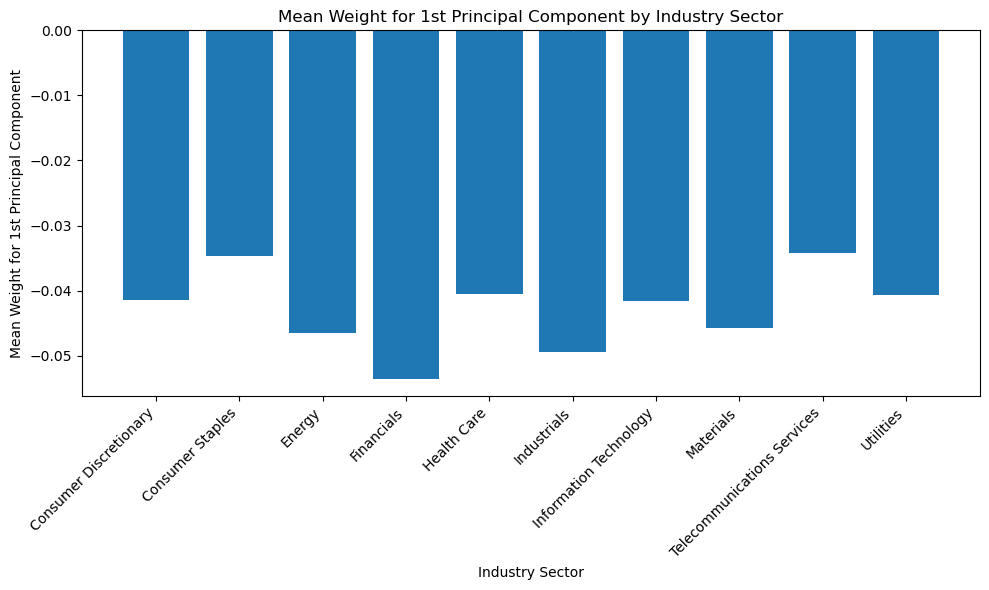

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_data' is your DataFrame with columns 'date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES'

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv' 
stock_data = pd.read_csv(file_path, parse_dates=['date'])

# Ensure the 'date' column is of datetime type and set it as the index
stock_data.set_index('date', inplace=True)

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca_result = pca.fit_transform(log_returns_standardized)

# Extract the weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Create DataFrames to display the weights
weights_df_pc1 = pd.DataFrame(data={'Feature': log_returns.columns, 'Weight_PC1': weights_pc1})
weights_df_pc2 = pd.DataFrame(data={'Feature': log_returns.columns, 'Weight_PC2': weights_pc2})

print("Weights for the 1st Principal Component:")
print(weights_df_pc1)

print("\nWeights for the 2nd Principal Component:")
print(weights_df_pc2)

industry_info_path = '/Users/macbookair/Downloads/SP500_ticker.csv'

# Load industry information from CSV
industry_info = pd.read_csv(industry_info_path, encoding='latin-1')
industry_info['sector'] = industry_info['sector'].str.strip()


# Merge industry information with weights for the 1st principal component
merged_df_pc1 = pd.merge(weights_df_pc1, industry_info, left_on='Feature', right_on='ticker')

# Group by industry and calculate the mean weight for the 1st principal component
mean_weights_by_industry_pc1 = merged_df_pc1.groupby('sector')['Weight_PC1'].mean().reset_index()


# Display the result
print("Mean Weights for the 1st Principal Component by Industry:")
print(mean_weights_by_industry_pc1)


plt.figure(figsize=(10, 6))
plt.bar(mean_weights_by_industry_pc1['sector'], mean_weights_by_industry_pc1['Weight_PC1'])
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight for 1st Principal Component')
plt.title('Mean Weight for 1st Principal Component by Industry Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Weights for the 1st Principal Component:
    Feature  Weight_PC1
0       MMM   -0.061483
1       ACE   -0.056123
2       ABT   -0.013384
3       ANF   -0.031428
4      ADBE   -0.048731
..      ...         ...
466      XL   -0.056008
467    YHOO   -0.037920
468     YUM   -0.040894
469     ZMH   -0.049911
470    ZION   -0.055354

[471 rows x 2 columns]

Weights for the 2nd Principal Component:
    Feature  Weight_PC2
0       MMM   -0.004348
1       ACE    0.037012
2       ABT    0.016967
3       ANF   -0.038111
4      ADBE   -0.022370
..      ...         ...
466      XL    0.004637
467    YHOO   -0.026708
468     YUM    0.003042
469     ZMH    0.008004
470    ZION   -0.037071

[471 rows x 2 columns]
Mean Weights for the 2nd Principal Component by Industry:
                        sector  Weight_PC2
0       Consumer Discretionary   -0.006975
1             Consumer Staples    0.045294
2                       Energy   -0.037365
3                   Financials    0.004759
4                  H

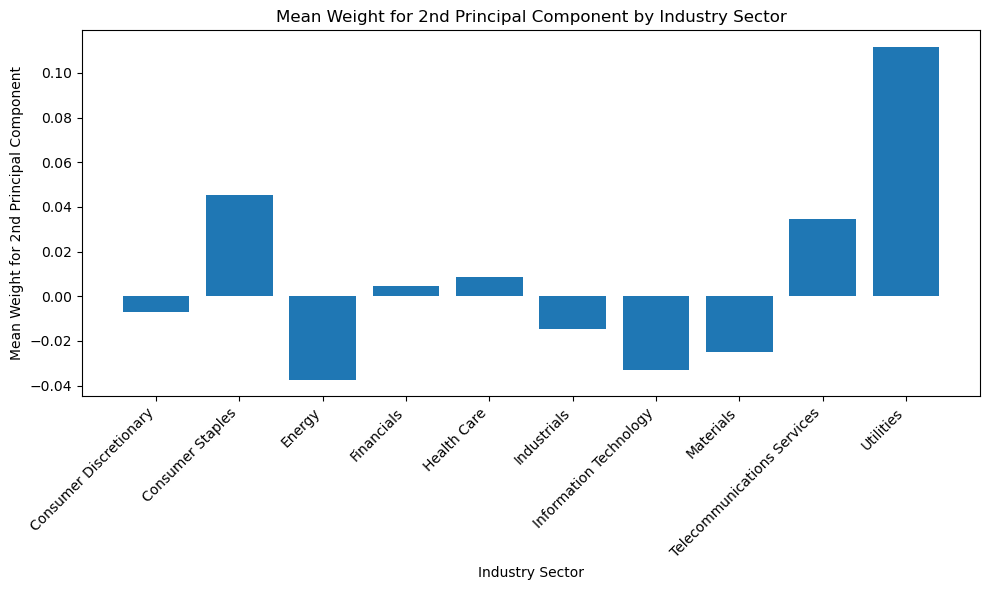

In [41]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'stock_data' is your DataFrame with columns 'date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES'

# Read stock price data from a CSV file
file_path = '/Users/macbookair/Downloads/SP500_close_price_no_missing.csv' 
stock_data = pd.read_csv(file_path, parse_dates=['date'])

# Ensure the 'date' column is of datetime type and set it as the index
stock_data.set_index('date', inplace=True)

# Calculate log returns
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca_result = pca.fit_transform(log_returns_standardized)

# Extract the weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Create DataFrames to display the weights
weights_df_pc1 = pd.DataFrame(data={'Feature': log_returns.columns, 'Weight_PC1': weights_pc1})
weights_df_pc2 = pd.DataFrame(data={'Feature': log_returns.columns, 'Weight_PC2': weights_pc2})

print("Weights for the 1st Principal Component:")
print(weights_df_pc1)

print("\nWeights for the 2nd Principal Component:")
print(weights_df_pc2)

industry_info_path = '/Users/macbookair/Downloads/SP500_ticker.csv'

# Load industry information from CSV
industry_info = pd.read_csv(industry_info_path, encoding='latin-1')
industry_info['sector'] = industry_info['sector'].str.strip()


# Merge industry information with weights for the 1st principal component
merged_df_pc2 = pd.merge(weights_df_pc2, industry_info, left_on='Feature', right_on='ticker')

# Group by industry and calculate the mean weight for the 1st principal component
mean_weights_by_industry_pc2 = merged_df_pc2.groupby('sector')['Weight_PC2'].mean().reset_index()


# Display the result
print("Mean Weights for the 2nd Principal Component by Industry:")
print(mean_weights_by_industry_pc2)


plt.figure(figsize=(10, 6))
plt.bar(mean_weights_by_industry_pc2['sector'], mean_weights_by_industry_pc2['Weight_PC2'])
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight for 2nd Principal Component')
plt.title('Mean Weight for 2nd Principal Component by Industry Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('/Users/macbookair/Downloads/BMI.csv')

# Extract predictors (features) and response variable
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Function for forward stepwise regression
def forward_stepwise_regression(X, y):
    selected_features = []
    remaining_features = list(X.columns)

    while remaining_features:
        best_pvalue = float('inf')
        best_feature = None

        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]

            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)

    return selected_features

# Function for backward stepwise regression
def backward_stepwise_regression(X, y):
    all_features = list(X.columns)
    selected_features = all_features.copy()

    while selected_features:
        model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
        pvalues = model.pvalues.iloc[1:]

        worst_feature = pvalues.idxmax()

        if pvalues[worst_feature] > 0.05:
            break
        else:
            selected_features.remove(worst_feature)

    return selected_features

# Perform forward stepwise regression
forward_selected_features = forward_stepwise_regression(X, y)
print("Forward Selected Features:", forward_selected_features)

# Perform backward stepwise regression
backward_selected_features = backward_stepwise_regression(X, y)
print("Backward Selected Features:", backward_selected_features)


Forward Selected Features: ['Abdomen', 'Weight', 'Wrist', 'Forearm', 'Neck', 'Age', 'Thigh', 'Hip', 'Height', 'Biceps', 'Ankle', 'Chest', 'Knee']
Backward Selected Features: ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/macbookair/Downloads/BMI.csv')

# Extract predictors (features) and response variable
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Calculate correlation coefficients between input variables and output
correlation_with_output = X.corrwith(y)

# Sort features based on absolute correlation coefficients
sorted_features = correlation_with_output.abs().sort_values(ascending=False)

# Display the ranking
print("Feature Ranking based on Correlation with Output:")
print(sorted_features)


Feature Ranking based on Correlation with Output:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/Users/macbookair/Downloads/BMI.csv')

# Extract predictors (features) and response variable
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) based on your requirements
lasso_model.fit(X_train_scaled, y_train)

# Display selected features
lasso_selected_features = X.columns[lasso_model.coef_ != 0]
print("Lasso Regression Selected Features:", lasso_selected_features)


Lasso Regression Selected Features: Index(['Age', 'Weight', 'Height', 'Neck', 'Abdomen', 'Thigh', 'Biceps',
       'Forearm', 'Wrist'],
      dtype='object')


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('/Users/macbookair/Downloads/BMI.csv')

# Extract predictors (features) and response variable
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) based on your requirements
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Random Forest Feature Importances:")
print(feature_importance_df)


Random Forest Feature Importances:
    Feature  Importance
5   Abdomen    0.731153
2    Height    0.029401
1    Weight    0.029395
12    Wrist    0.026041
8      Knee    0.023688
3      Neck    0.023267
6       Hip    0.022485
0       Age    0.022080
7     Thigh    0.020623
4     Chest    0.020444
9     Ankle    0.019897
10   Biceps    0.017453
11  Forearm    0.014072
